# Anomaly Detection (tutorial 1)

(array([500]),)


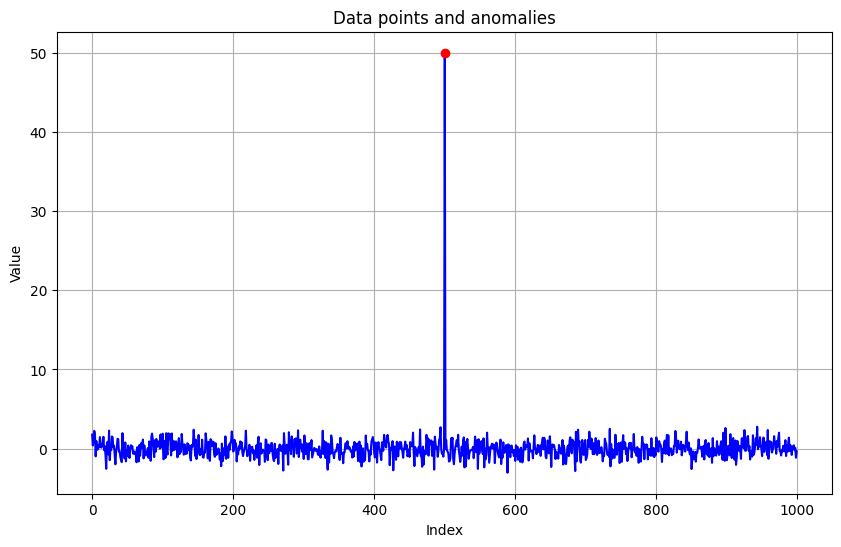

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(0)

# Generate 1000 data points from a normal distribution with mean 0 and standard deviation 1
data = np.random.normal(0, 1, 1000)

# Introduce an anomaly - a point that is much different than the rest
data[500] = 50

# A simple anomaly detection function
def detect_anomalies(data, threshold=3):
    # Calculate the mean and standard deviation of the data
    mean, std = np.mean(data), np.std(data)
    # Identify anomalies - points that are more than `threshold` standard deviations away from the mean
    anomalies = np.abs(data - mean) > threshold * std
    return anomalies

# Detect anomalies
anomalies = detect_anomalies(data)      # index for anomaly data
print(np.where(anomalies))

# Plot the data and the anomalies
plt.figure(figsize=(10, 6))
plt.plot(data, 'b-')
plt.plot(np.where(anomalies)[0], data[anomalies], 'ro')
plt.title('Data points and anomalies')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [3]:
test = np.array([0, 0, 0, 1, 0 ,0])
test[np.where(test)[0]]

array([1])

## Z-test

In [4]:
'''
In this example, we first generate two groups of random data from a 
normal distribution. The np.random.normal function generates random 
numbers from a normal distribution with a specified mean and standard 
deviation. We then perform a Z-Test using the stats.ttest_ind function 
from the scipy library. This function returns two values: the Z-Score 
and the P-Value. The Z-Score is a measure of how many standard deviations 
an element is from the mean. The P-Value is used in hypothesis testing 
to help you support or reject the null hypothesis. It represents the 
probability that the results of your test occurred at random. If p-value 
is less than 0.05, we reject the null hypothesis.
'''

from scipy import stats
import numpy as np

# Generate random data
np.random.seed(0)
group1 = np.random.normal(0.1, 1.0, 1000)
group2 = np.random.normal(0.2, 1.0, 1000)

# Perform Z-Test
z_score, p_value = stats.ttest_ind(group1, group2)
print(f"Z-Score: {z_score}, P-Value: {p_value}")

Z-Score: -3.631948749571147, P-Value: 0.00028837831940553923


In [5]:
from scipy.stats import norm

def z_test(sample_mean, population_mean, population_std, sample_size, alpha=0.05):
    """
    Perform a one-sample z-test and compute the z-score.

    Parameters:
        sample_mean (float): The mean of the sample.
        population_mean (float): The mean of the population.
        population_std (float): The standard deviation of the population.
        sample_size (int): The size of the sample.
        alpha (float): The significance level (default is 0.05 for a 95% confidence level).

    Returns:
        z_score (float): The computed z-score.
        p_value (float): The p-value for the test.
        critical_value (float): The critical value for the significance level.
        is_significant (bool): True if the result is significant, False otherwise.
    """
    # Compute the standard error
    standard_error = population_std / (sample_size ** 0.5)

    # Compute the z-score
    z_score = (sample_mean - population_mean) / standard_error

    # Compute the p-value (two-tailed test)
    p_value = 2 * (1 - norm.cdf(abs(z_score)))

    # Determine the critical value for the given alpha (two-tailed)
    critical_value = norm.ppf(1 - alpha / 2)

    # Check significance
    is_significant = abs(z_score) > critical_value

    return z_score, p_value, critical_value, is_significant


# Example Usage:
sample_mean = 400
population_mean = 500
population_std = 50
sample_size = 12
alpha = 0.05

z_score, p_value, critical_value, is_significant = z_test(sample_mean, population_mean, population_std, sample_size, alpha)

print(f"Z-Score: {z_score:.2f}")
print(f"P-Value: {p_value:.4f}")
print(f"Critical Value (±): {critical_value:.2f}")
print(f"Is the result significant? {'Yes' if is_significant else 'No'}")


Z-Score: -6.93
P-Value: 0.0000
Critical Value (±): 1.96
Is the result significant? Yes


## T-test

In [6]:
'''
This example is very similar to the Z-Test example. The difference is that 
we are using smaller sample sizes (30 instead of 1000). The T-Test is more 
appropriate than the Z-Test when the sample size is small. The interpretation 
of the T-Score and P-Value is the same as for the Z-Test.
'''

# Generate random data
np.random.seed(0)
group1 = np.random.normal(0.1, 1.0, 30)
group2 = np.random.normal(0.2, 1.0, 30)

# Perform T-Test
t_score, p_value = stats.ttest_ind(group1, group2)
print(f"T-Score: {t_score}, P-Value: {p_value}")

T-Score: 2.421173504228532, P-Value: 0.018620022435273602


In [7]:
from scipy.stats import t

def t_test(sample, population_mean, alpha=0.05):
    """
    Perform a one-sample t-test.

    Parameters:
        sample (list or array): The sample data points.
        population_mean (float): The mean of the population to test against.
        alpha (float): The significance level (default is 0.05 for a 95% confidence level).

    Returns:
        t_stat (float): The computed t-statistic.
        p_value (float): The p-value for the test.
        critical_value (float): The critical t-value for the significance level.
        is_significant (bool): True if the result is significant, False otherwise.
    """
    # Calculate sample mean and standard deviation
    sample_mean = sum(sample) / len(sample)
    sample_std = (sum((x - sample_mean) ** 2 for x in sample) / (len(sample) - 1)) ** 0.5

    # Compute the t-statistic
    t_stat = (sample_mean - population_mean) / (sample_std / len(sample) ** 0.5)

    # Degrees of freedom
    df = len(sample) - 1

    # Compute the p-value (two-tailed)
    p_value = 2 * (1 - t.cdf(abs(t_stat), df))

    # Determine the critical t-value for the given alpha (two-tailed)
    critical_value = t.ppf(1 - alpha / 2, df)

    # Check significance
    is_significant = abs(t_stat) > critical_value

    return t_stat, p_value, critical_value, is_significant


# Example Usage:
sample = [480, 490, 495, 505, 510, 520, 485, 470]
population_mean = 500
alpha = 0.05

t_stat, p_value, critical_value, is_significant = t_test(sample, population_mean, alpha)

print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")
print(f"Critical Value (±): {critical_value:.2f}")
print(f"Is the result significant? {'Yes' if is_significant else 'No'}")

T-Statistic: -0.96
P-Value: 0.3689
Critical Value (±): 2.36
Is the result significant? No


In [8]:
from scipy.stats import ttest_ind

def two_sample_t_test(sample1, sample2, alpha=0.05):
    """
    Perform a two-sample t-test for independent samples.

    Parameters:
        sample1 (list or array): The data points for the first sample.
        sample2 (list or array): The data points for the second sample.
        alpha (float): The significance level (default is 0.05 for a 95% confidence level).

    Returns:
        t_stat (float): The computed t-statistic.
        p_value (float): The p-value for the test.
        is_significant (bool): True if the result is significant, False otherwise.
    """
    # Perform the two-sample t-test
    t_stat, p_value = ttest_ind(sample1, sample2, equal_var=True)  # Assume equal variances

    # Determine if the result is significant
    is_significant = p_value < alpha

    return t_stat, p_value, is_significant


# Example Usage:
class_a_scores = [85, 90, 88, 78, 92, 95, 89, 91]
class_b_scores = [72, 75, 78, 74, 80, 79, 77, 76]
alpha = 0.05

t_stat, p_value, is_significant = two_sample_t_test(class_a_scores, class_b_scores, alpha)

print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")
print(f"Is the result significant? {'Yes' if is_significant else 'No'}")


T-Statistic: 5.91
P-Value: 0.0000
Is the result significant? Yes


## ANOVA test

In [9]:
'''
In this example, we generate three groups of random data and perform an 
ANOVA test using the stats.f_oneway function. The F-Score is a measure of 
how much the means of each group differ from the mean of the overall data 
set. The P-Value is the same as in the previous examples. If the P-Value 
is less than 0.05, we can reject the null hypothesis that the means of 
all groups are equal.
'''

# Generate random data
np.random.seed(0)
group1 = np.random.normal(0.1, 1.0, 30)
group2 = np.random.normal(0.2, 1.0, 30)
group3 = np.random.normal(0.3, 1.0, 30)

# Perform ANOVA
f_score, p_value = stats.f_oneway(group1, group2, group3)
print(f"F-Score: {f_score}, P-Value: {p_value}")

F-Score: 3.0583006692442627, P-Value: 0.052048465538565784


## Linear regression

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.810e+04
Date:                Wed, 08 Jan 2025   Prob (F-statistic):          9.03e-129
Time:                        09:16:16   Log-Likelihood:                 85.585
No. Observations:                 100   AIC:                            -167.2
Df Residuals:                      98   BIC:                            -162.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0075      0.010      0.722      0.4

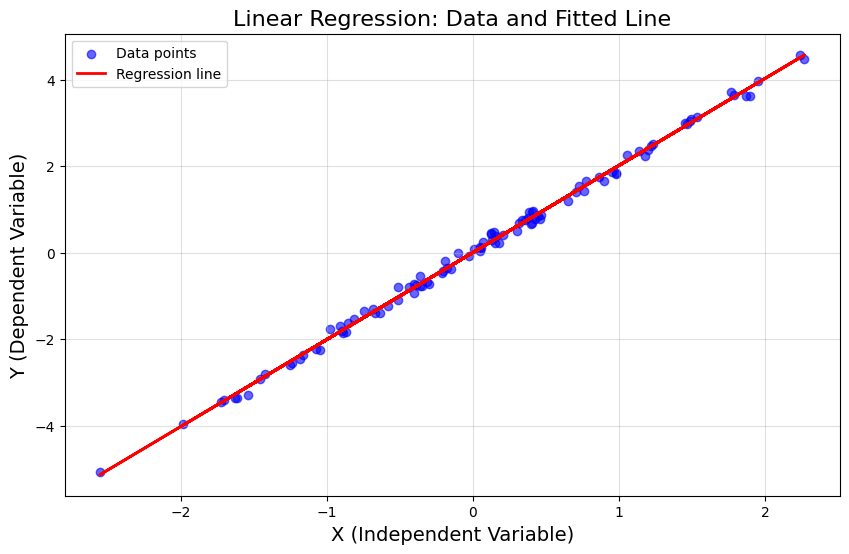

In [10]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(0)
X_orig = np.random.normal(0, 1.0, 100)  # Original X without the constant
Y = 2 * X_orig + np.random.normal(0, 0.1, 100)

# Add constant to input variables
X = sm.add_constant(X_orig)

# Perform Linear Regression
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

# Extract regression line
predicted_Y = results.predict(X)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.scatter(X_orig, Y, color='blue', alpha=0.6, label='Data points')

# Plot the regression line
plt.plot(X_orig, predicted_Y, color='red', label='Regression line', linewidth=2)

# Add labels, title, and legend
plt.xlabel('X (Independent Variable)', fontsize=14)
plt.ylabel('Y (Dependent Variable)', fontsize=14)
plt.title('Linear Regression: Data and Fitted Line', fontsize=16)
plt.legend()
plt.grid(alpha=0.4)
plt.show()


In [11]:
'''
In this case, the p-value will give us the probability that we would see 
these results given the null hypothesis of no association between the 
categorical variables. If this p-value is below a certain significance 
level (often 0.05), we reject the null hypothesis and conclude that there 
is a statistically significant association between the variables.
'''

from scipy.stats import chi2_contingency

# Define a 2-D contingency table
table = np.array([[10, 20, 30],
                  [20, 40, 60]])

chi2, p, dof, ex = chi2_contingency(table)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Expected table: \n{ex}")

Chi-Square statistic: 0.0
P-value: 1.0
Degrees of freedom: 2
Expected table: 
[[10. 20. 30.]
 [20. 40. 60.]]


## Generalized Extreme Value (GEV) Distribution

Shape parameter (x): 0.0177286908063604
Location parameter (m): 20.541960221717268
Scale parameter (s): 5.186148872789918


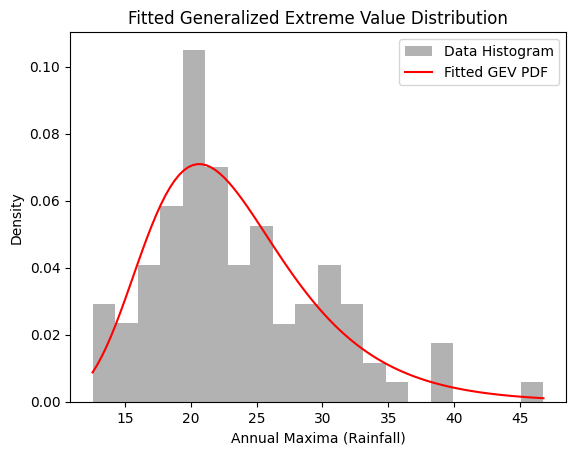

In [12]:
from scipy.stats import genextreme

# Generate random data (simulating annual maxima of daily rainfall)
np.random.seed(0)
data = np.random.gumbel(loc=20, scale=5, size=100)  # Gumbel distribution example

# Fit the GEV distribution
shape, loc, scale = genextreme.fit(data)

# Print fitted parameters
print("Shape parameter (x):", shape)
print("Location parameter (m):", loc)
print("Scale parameter (s):", scale)

# Plot the PDF and data histogram
x = np.linspace(min(data), max(data), 100)
pdf = genextreme.pdf(x, shape, loc, scale)

plt.hist(data, bins=20, density=True, alpha=0.6, color='gray', label="Data Histogram")
plt.plot(x, pdf, 'r-', label="Fitted GEV PDF")
plt.xlabel("Annual Maxima (Rainfall)")
plt.ylabel("Density")
plt.legend()
plt.title("Fitted Generalized Extreme Value Distribution")
plt.show()

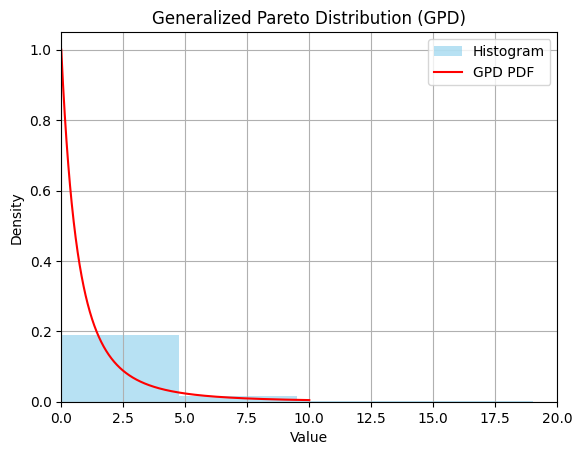

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genpareto

# Set GPD parameters
shape = 0.5  # xi (shape parameter)
loc = 0      # mu (location parameter)
scale = 1    # sigma (scale parameter)

# Generate random data from GPD
data = genpareto.rvs(c=shape, loc=loc, scale=scale, size=1000)

# Plot histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', label="Histogram")

# Generate GPD PDF for plotting
x = np.linspace(0, 10, 1000)
pdf = genpareto.pdf(x, c=shape, loc=loc, scale=scale)

plt.plot(x, pdf, 'r-', label='GPD PDF')
plt.xlim(0, 20)
plt.title('Generalized Pareto Distribution (GPD)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()


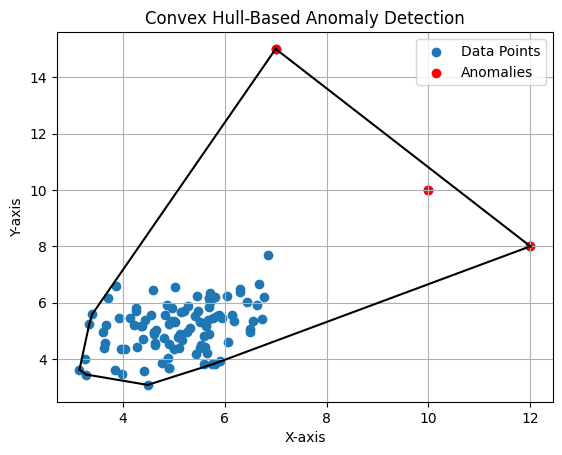

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

# Generate 2D data points (normal data)
np.random.seed(42)
cluster = np.random.multivariate_normal([5, 5], [[1, 0.5], [0.5, 1]], size=100)

# Add anomalies (outliers)
anomalies = np.array([[10, 10], [12, 8], [7, 15]])

# Combine data
data = np.vstack((cluster, anomalies))

# Compute Convex Hull
hull = ConvexHull(data)

# Plot data points
plt.scatter(data[:, 0], data[:, 1], label='Data Points')
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='red', label='Anomalies')

# Plot convex hull
for simplex in hull.simplices:
    plt.plot(data[simplex, 0], data[simplex, 1], 'k-')

plt.title("Convex Hull-Based Anomaly Detection")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid()
plt.show()


## PCA

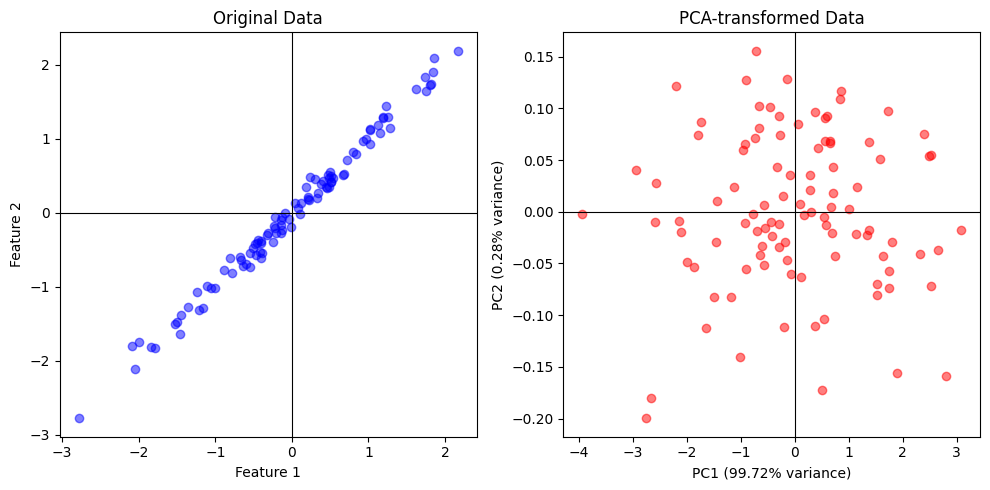

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Generate a 2D dataset
np.random.seed(42)
x = np.random.normal(0, 1, 100)
y = 2 * x + np.random.normal(0, 0.2, 100)
data = np.column_stack((x, y))

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply PCA
pca = PCA(n_components=2)  # Keep both components for visualization
data_pca = pca.fit_transform(data_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot the original data and principal components
plt.figure(figsize=(10, 5))

# Plot original data
plt.subplot(1, 2, 1)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], color='blue', alpha=0.5)
plt.title("Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)

# Plot data in PCA space
plt.subplot(1, 2, 2)
plt.scatter(data_pca[:, 0], data_pca[:, 1], color='red', alpha=0.5)
plt.title("PCA-transformed Data")
plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}% variance)")
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)

plt.tight_layout()
plt.show()


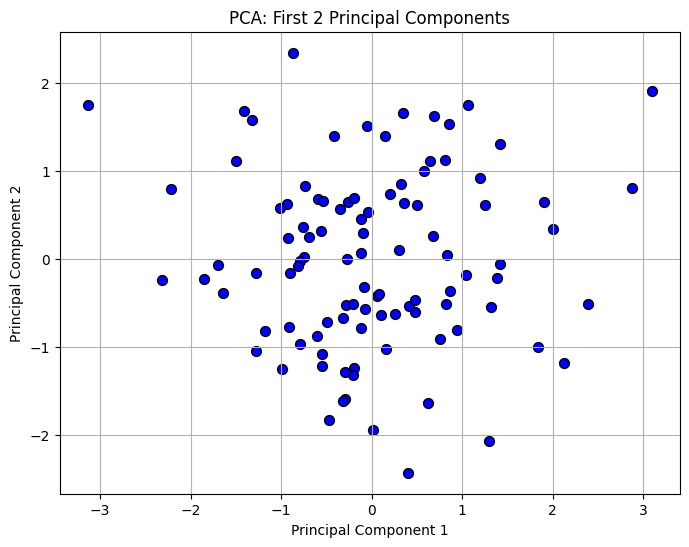

Explained variance by component: [0.28981968 0.24978619]


In [16]:
# Generate a sample dataset
np.random.seed(42)
data = np.random.randn(100, 4)  # 100 samples, 3 features

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
pca_result = pca.fit_transform(scaled_data)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First 2 Principal Components')
plt.grid(True)
plt.show()

# Explained variance
print(f'Explained variance by component: {pca.explained_variance_ratio_}')

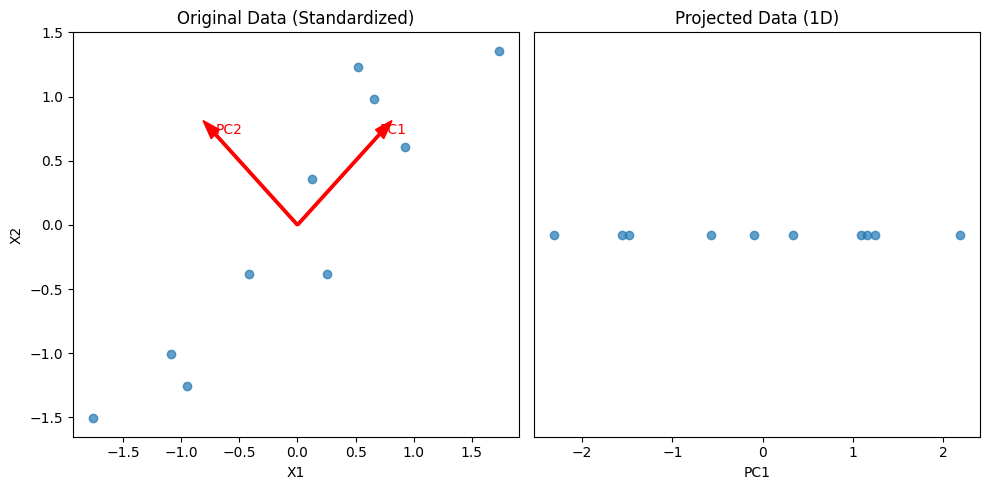

Eigenvalues: [2.13992141 0.08230081]
Eigenvectors (Principal Components):
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Projected Data (1D):
 [[ 1.08643242]
 [-2.3089372 ]
 [ 1.24191895]
 [ 0.34078247]
 [ 2.18429003]
 [ 1.16073946]
 [-0.09260467]
 [-1.48210777]
 [-0.56722643]
 [-1.56328726]]


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the dataset
X = np.array([[2.5, 2.4], [0.5, 0.7], [2.2, 2.9], [1.9, 2.2], [3.1, 3.0],
              [2.3, 2.7], [2.0, 1.6], [1.0, 1.1], [1.5, 1.6], [1.1, 0.9]])

# Step 2: Standardize the data (mean = 0, std = 1)
X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Step 3: Compute the covariance matrix
cov_matrix = np.cov(X_standardized, rowvar=False)

# Step 4: Perform eigenvalue decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 5: Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 6: Select the top k principal components (here, k=1)
k = 1
top_k_eigenvectors = eigenvectors[:, :k]

# Step 7: Project the data onto the principal components
X_projected = X_standardized.dot(top_k_eigenvectors)

# Step 8: Visualize the results
plt.figure(figsize=(10, 5))

# Plot original data
plt.subplot(1, 2, 1)
plt.scatter(X_standardized[:, 0], X_standardized[:, 1], alpha=0.7)
plt.title("Original Data (Standardized)")
plt.xlabel("X1")
plt.ylabel("X2")

# Plot principal components
for i in range(len(eigenvectors)):
    plt.arrow(0, 0, eigenvectors[0, i], eigenvectors[1, i], color='r', width=0.02, head_width=0.1)
    plt.text(eigenvectors[0, i], eigenvectors[1, i], f'PC{i+1}', color='r')

# Plot projected data
plt.subplot(1, 2, 2)
plt.scatter(X_projected, np.zeros_like(X_projected), alpha=0.7)
plt.title("Projected Data (1D)")
plt.xlabel("PC1")
plt.yticks([])

plt.tight_layout()
plt.show()

# Print results
print("Eigenvalues:", eigenvalues)
print("Eigenvectors (Principal Components):\n", eigenvectors)
print("Projected Data (1D):\n", X_projected)

## KNN

X shape:(6, 2)
y shape:(6,)
Predicted Class: A


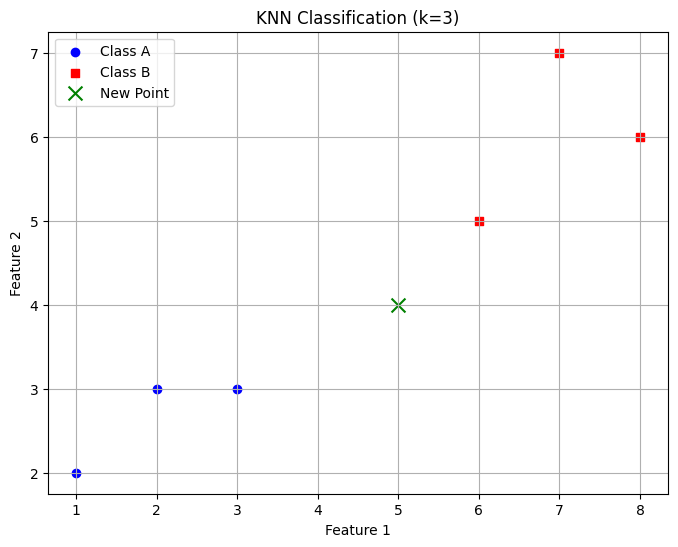

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Define the dataset
X = np.array([[1, 2], [2, 3], [3, 3], [6, 5], [7, 7], [8, 6]])  # Features
y = np.array(['A', 'A', 'A', 'B', 'B', 'B'])  # Labels
print(f"X shape:{X.shape}")
print(f"y shape:{y.shape}")

# Step 2: Create and train the KNN model
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

# Step 3: New data point
new_point = np.array([[5, 4]])

# Step 4: Predict the class
predicted_class = knn.predict(new_point)
print(f"Predicted Class: {predicted_class[0]}")

# Step 5: Visualize the data and decision boundary
plt.figure(figsize=(8, 6))

# Plot training data
plt.scatter(X[y == 'A', 0], X[y == 'A', 1], c='blue', label='Class A', marker='o')
plt.scatter(X[y == 'B', 0], X[y == 'B', 1], c='red', label='Class B', marker='s')

# Plot new point
plt.scatter(new_point[0, 0], new_point[0, 1], c='green', label='New Point', marker='x', s=100)

# Add labels and legend
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"KNN Classification (k={k})")
plt.legend()
plt.grid()
plt.show()